In [79]:
from pymongo import MongoClient
from IPython.display import display, HTML, JSON
import pandas as pd
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt

In [61]:
sci_col = MongoClient()["scimago"]["stage"]

In [81]:
#obtenemos todos los artículos por año para saber el ranking para el año específico
scores = []
for year in range(2013,2024):
    #year=2013
    print(year)
    current_score = {}
    current_score["year"] = year
    data = list(MongoClient()["openalex_udea"]["works"].find({"type":"article","publication_year":year,"primary_location.source.issn":{"$ne":None}}))
    score=[]
    for paper in data:
        issns = paper["primary_location"]["source"]["issn"]
        for issn in issns:
            issn = issn.replace("-","") ## scimago issn is not splitted by -
            rec = sci_col.find_one({"Issn":issn})
            if rec is not None:
                score.append(rec['H index'])
    current_score["score"] = score
    current_score["data_len"] = len(data)
    current_score["score_len"] = len(score)
    scores.append(current_score)

2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [85]:
for score in scores:
    print(f"year = {score['year']}")
    print(f"min  = {np.min(score['score'])}")
    print(f"max  = {np.max(score['score'])}")
    print("-"*10)
    

year = 2013
min  = 0
max  = 838
----------
year = 2014
min  = 0
max  = 1331
----------
year = 2015
min  = 0
max  = 855
----------
year = 2016
min  = 0
max  = 1283
----------
year = 2017
min  = 0
max  = 1130
----------
year = 2018
min  = 0
max  = 1130
----------
year = 2019
min  = 0
max  = 1283
----------
year = 2020
min  = 0
max  = 1283
----------
year = 2021
min  = 0
max  = 1283
----------
year = 2022
min  = 0
max  = 856
----------
year = 2023
min  = 0
max  = 1331
----------


In [89]:
thold=200
years = []
payload = {}
payload["papers"]=[]
payload[f"H index > {thold}"]=[]

for score in scores:
    years.append(str(score["year"]))
    payload["papers"].append(score["data_len"])
    count = 0
    for i in score['score']:
        if i > thold:
            count+=1
    payload[f"H index > {thold}"].append(count)
payload

{'papers': [1474, 1415, 1434, 1535, 2066, 1755, 1709, 1985, 1996, 2005, 1771],
 'H index > 200': [150, 176, 226, 223, 260, 295, 284, 310, 285, 267, 290]}

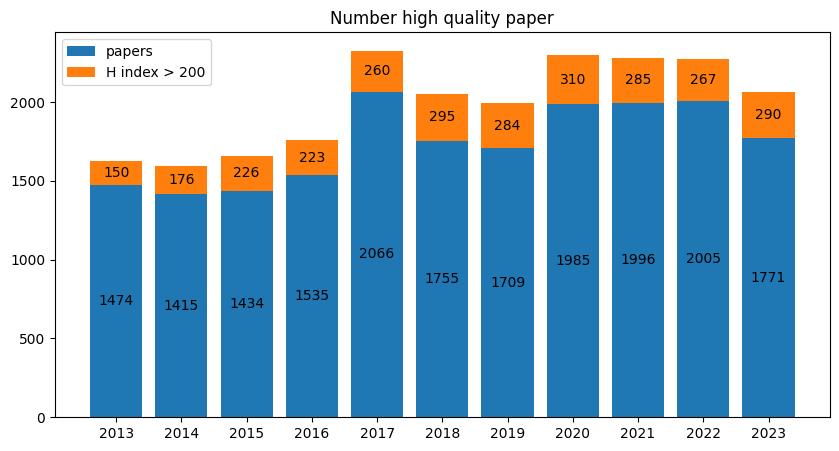

In [97]:

width = 0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(11)

for title, count in payload.items():
    p = ax.bar(years, count, width, label=title, bottom=bottom)
    bottom += count

    ax.bar_label(p, label_type='center')

ax.set_title('Number high quality paper')
ax.legend()

plt.show()